# Plotting Astronomical Images with Real Coordiantes - WCSAxes

When it comes to producing publication or report quality plots, especially for observers, it is often very handy to have the axes display the correct coordinate system; usually either RA and Dec, or Galactic Lat and Lon. 

There are several packages that can do this, and some are easier to use than others. But WCSAxes is easily the most versetile. Sometimes things can be a little bit round-about, but the power and freedom WCSAxes (and the associated coordinate packages from AstroPy) provides is second to none. 

What we are going to do is import the packages and modules we need, and then plot the example image with RA and Dec axes. After that, we will look at converting between coordinate systems (WCSAxes will usually pick the one listed in the FITS header automatically, but sometimes you may want to change that).

## Importing the modules and plotting with the default axes

In [1]:
from astropy.io import fits # handles the reading in of FITS files
from astropy.wcs import WCS # handles World Coordinate Systems and their creation from fits headers
from astropy import units as u # an extremely helpful module that handles astronomical units flawlessly
import matplotlib.pyplot as plt # handles plotting

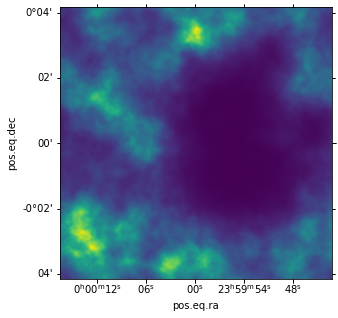

In [2]:
path_to_fits = './Data/ExampleFITS.fits'

imageData = fits.getdata(path_to_fits) # This extracts the image data from the fits file
imageHeader = fits.getheader(path_to_fits) # And this extracts the header file, which is important for mapping the coordiante system to the pixels

wcs = WCS(imageHeader) # this creates a WCS object which is able to handle the pixel-to-coordinate mapping

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection = wcs) # the projection argument is what converts the pixel coordinates into WCS coordinates for plotting
img = ax.imshow(imageData, origin = 'lower')

And there we go. Its as easy as that. Lets just take some time to make it a little prettier. 

First, we can turn each axis into a callable object, making editing them way easier! We can then do a number of edits that will make things look better! 

**NOTE: I am going to repeat the code that plots the image here. This is only necessary because of how jupyter notebooks works. You can just add the new command to your script in something like spyder and it will work without having to repeat the earlier code!**

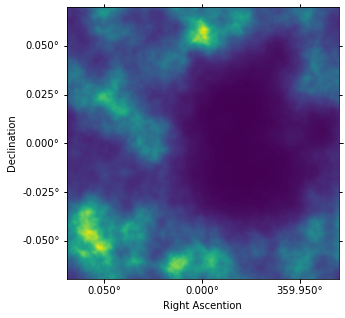

In [3]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection = wcs) 
img = ax.imshow(imageData, origin = 'lower')

# Lets grab the indivudual axes
x_axis = ax.coords[0] # This turns the x axis into a callable variable
y_axis = ax.coords[1] # And this does the same for the y axis

# Lets change the axis labels to something sensible
x_axis.set_axislabel('Right Ascention')
y_axis.set_axislabel('Declination')

# Lets change the format of the ticks. Personally, I prefer decimal degrees to degrees/arcminues/arcseconds and hours/minutes/seconds
x_axis.set_major_formatter('d.ddd') # d.d is decimal degrees where the 'd's after the point is the degree of decimalization.
# dd:mm:ss is degrees:arcmin:arcsec and hh:mm:ss is hours:minutes:seconds
y_axis.set_major_formatter('d.ddd')

# Lets change the frequency of the ticks, but only on the y axis!
y_axis.set_ticks(spacing=0.025 * u.degree)

Excelent! Now its really looking like an astronomical image. Just like with the coordinate-less example, you could plot a colour bar as you normally would, and this would be good to go!

But lets take things a step further...

## Changing the coordinate system

As discussed above, WCSAxes is clever enough to select the coordinate system desribed in the FITS header. In other words, if your observation is in RA and Dec, then the image will be too. But sometimes, you may wish to change from one coordinate system to another. This is done in a round-about way, by hiding one axis, and overplotting a new one! 

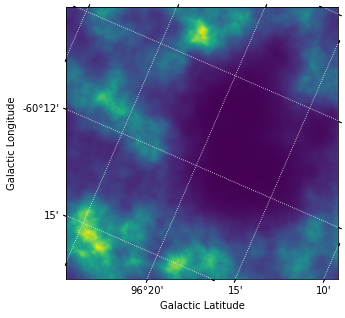

In [4]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection = wcs) 
img = ax.imshow(imageData, origin = 'lower')

x_axis = ax.coords[0] 
y_axis = ax.coords[1] 

# Lets hide the original axes
x_axis.set_ticks_visible(False)
x_axis.set_ticklabel_visible(False)
y_axis.set_ticks_visible(False)
y_axis.set_ticklabel_visible(False)

# Lets set up the new axis
overlay = ax.get_coords_overlay('galactic')
x_axis_galactic = overlay[0]
y_axis_galactic = overlay[1]

x_axis_galactic.set_axislabel('Galactic Latitude')
y_axis_galactic.set_axislabel('Galactic Longitude')

# Set the new position of the tick labels
x_axis_galactic.set_ticklabel_position('b')
y_axis_galactic.set_ticklabel_position('l')

# And set the new position of the axis labels
x_axis_galactic.set_axislabel_position('b')
y_axis_galactic.set_axislabel_position('l')

# Just to highlight that galactic and equitorial systems are misaligned...
overlay.grid(color='white', ls='dotted')

In fact, you can plot both sets of axis at the same time!

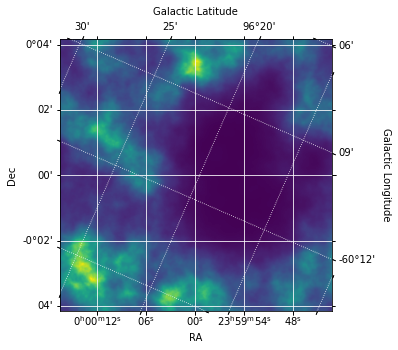

In [5]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection = wcs) 
img = ax.imshow(imageData, origin = 'lower')

x_axis = ax.coords[0] 
y_axis = ax.coords[1] 

x_axis.set_axislabel('RA')
y_axis.set_axislabel('Dec')
#Plot a solid grid for RA and Dec
ax.grid(color='white', ls='solid')

overlay = ax.get_coords_overlay('galactic')
x_axis_galactic = overlay[0]
y_axis_galactic = overlay[1]

x_axis_galactic.set_axislabel('Galactic Latitude')
y_axis_galactic.set_axislabel('Galactic Longitude')
# Plot a dotted grid for galactic!
overlay.grid(color='white', ls='dotted')